<a href="https://colab.research.google.com/github/eun-88/DataScientist_07/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [3]:
import tensorflow_datasets as tfds

tfds.__version__

'4.9.9'

데이터셋 다운로드

In [4]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [5]:
print(train_ds)
print(val_ds)
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

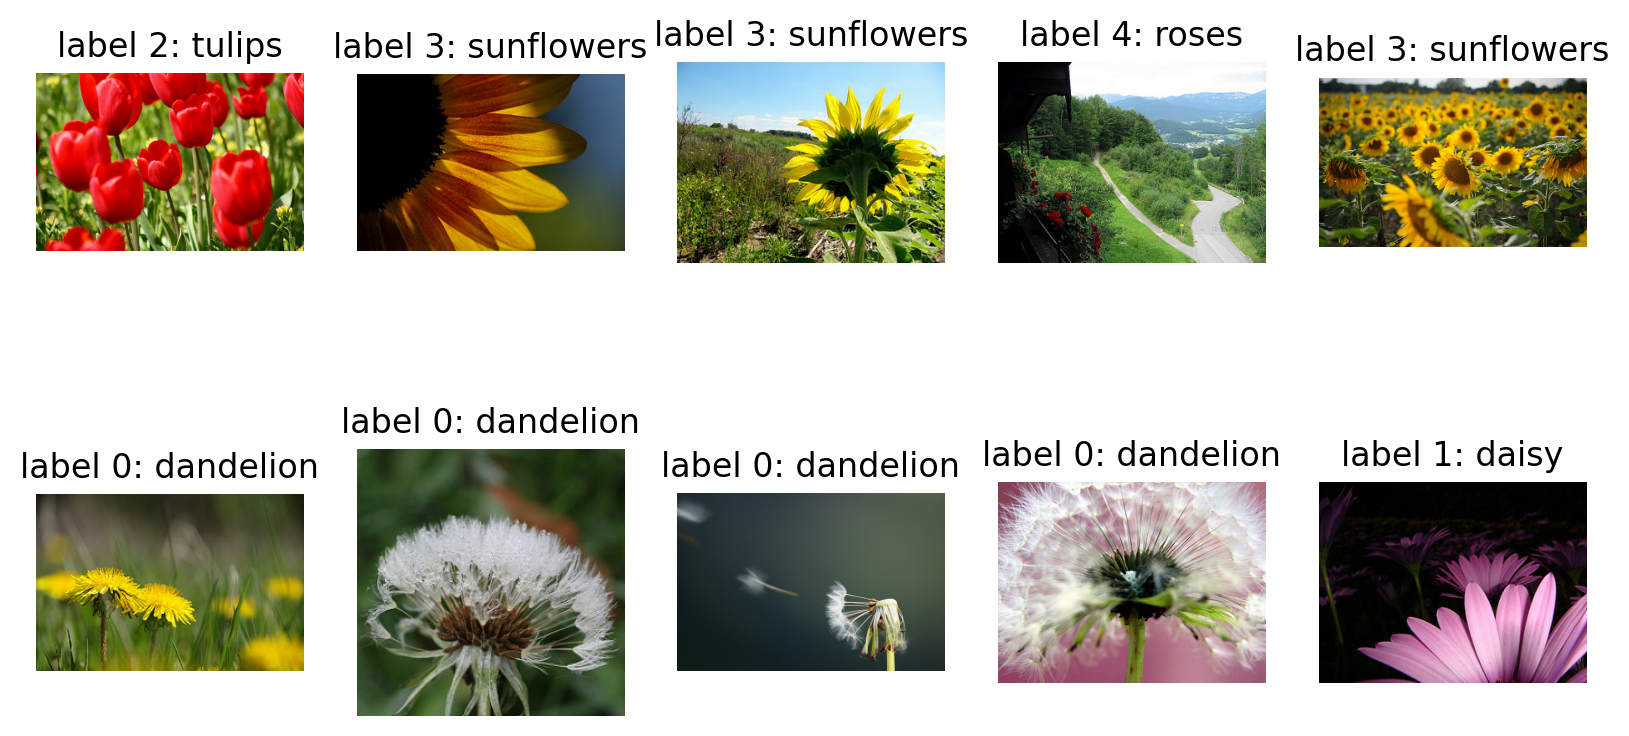

In [7]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train_ds.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

###이미지 전처리

In [8]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1  # 픽셀 값을 -1 ~ 1로 변환
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [9]:
train_batches = train_ds.map(format_example).shuffle(1000).batch(32)
validation_batches = val_ds.map(format_example).batch(32)
test_batches = test_ds.map(format_example).batch(32)

In [10]:
print(train_batches)
print(validation_batches)
print(test_batches)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


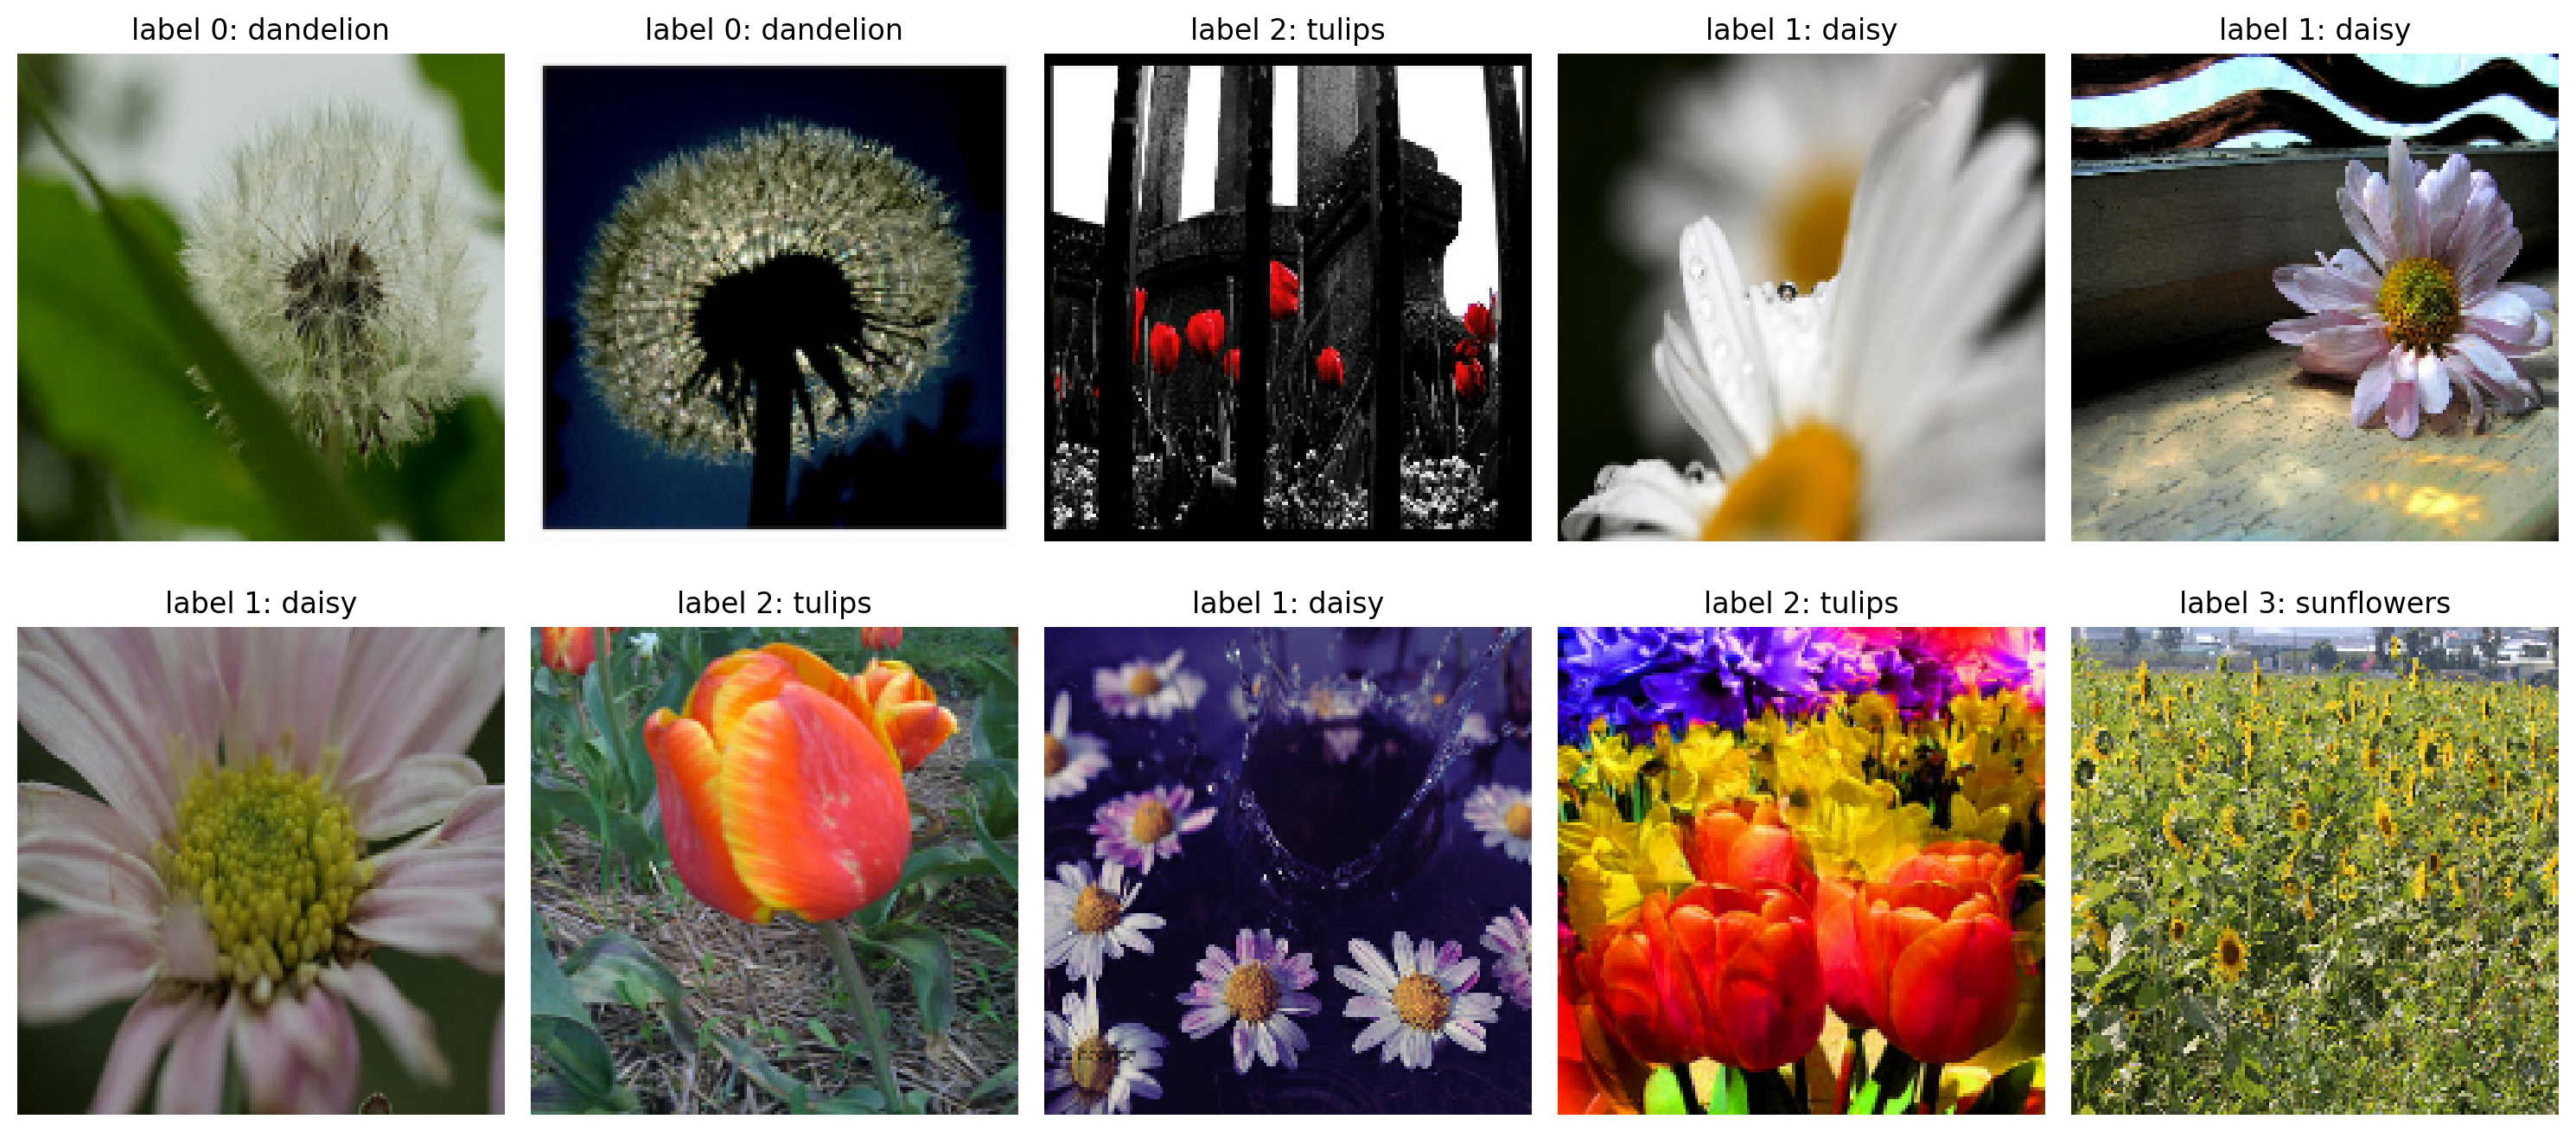

In [11]:
plt.figure(figsize=(15, 7)) # 가로로 조금 더 넓게 설정

get_label_name = metadata.features['label'].int2str

# train_batches에서 배치 10개를 가져옵니다.
for idx, (images, labels) in enumerate(train_batches.take(10)):
    plt.subplot(2, 5, idx + 1)

    # 배치(images) 중 첫 번째 이미지[0]만 선택
    img = images[0]
    # 배치(labels) 중 첫 번째 라벨[0]만 선택하여 정수로 변환
    lbl = int(labels[0])

    # 정규화 해제 (-1~1 -> 0~1)
    img = (img + 1) / 2

    plt.imshow(img)
    plt.title(f'label {lbl}: {get_label_name(lbl)}')
    plt.axis('off')

plt.tight_layout()
plt.show()

###모델링

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [13]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax')
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 꽃 데이터는 양이 아주 많지 않아서 10~15 Epoch 정도 추천합니다.
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.3477 - loss: 1.4532 - val_accuracy: 0.5831 - val_loss: 1.0762
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5949 - loss: 1.0264 - val_accuracy: 0.5831 - val_loss: 0.9948
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6673 - loss: 0.8818 - val_accuracy: 0.6104 - val_loss: 0.9932
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7167 - loss: 0.7855 - val_accuracy: 0.6458 - val_loss: 0.9287
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7722 - loss: 0.6466 - val_accuracy: 0.6185 - val_loss: 0.9884
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8184 - loss: 0.5460 - val_accuracy: 0.6540 - val_loss: 0.9419
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8585 - loss: 0.4594 - val_accuracy: 0.6485 - val_loss: 0.9264
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8951 - loss: 0.3764 - val_accuracy: 0.6485 - 

In [15]:
# 테스트 세트로 최종 성능 확인
loss, accuracy = model.evaluate(test_batches)
print(f"테스트 정확도: {accuracy:.4f}")

# 어떤 꽃들이 있는지 이름 확인해보기
class_names = metadata.features['label'].names
print("분류 가능한 꽃 종류:", class_names)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6164 - loss: 1.0780
테스트 정확도: 0.6322
분류 가능한 꽃 종류: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# 1. 베이스 모델 선택 (MobileNetV2: VGG16보다 가볍고 성능이 좋음)
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False # 일단 베이스는 고정!

# 2. 모델 설계 (Regularization 추가)
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),

    # Batch Normalization: 학습을 안정적으로 만들어줌
    layers.BatchNormalization(),

    layers.Dense(512, activation='relu'),

    # Dropout: 학습 시 일부 노드를 꺼서 과적합(Overfitting) 방지
    layers.Dropout(0.5),

    layers.Dense(5, activation='softmax') # 꽃 5종 분류
])

# 3. 옵티마이저 설정 (Learning Rate 변경 가능)
# Adam 옵티마이저를 쓰되, 학습률을 0.0001로 낮게 설정하여 정교하게 학습
custom_optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습 (Epoch을 20으로 늘려 충분히 학습)
EPOCHS = 20
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    validation_data=validation_batches
)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 314ms/step - accuracy: 0.4363 - loss: 1.6034 - val_accuracy: 0.8583 - val_loss: 0.5083
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7826 - loss: 0.6641 - val_accuracy: 0.8719 - val_loss: 0.3780
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8440 - loss: 0.4405 - val_accuracy: 0.8965 - val_loss: 0.3355
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8752 - loss: 0.3406 - val_accuracy: 0.8910 - val_loss: 0.3183
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8955 - loss: 0.3000 - val_accuracy: 0.8937 - val_loss: 0.3083
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9002 - loss: 0.2772 - val_accuracy: 0.8965 - val_loss: 0.3018
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9206 - loss: 0.2240 - val_accuracy: 0.9046 - val_loss: 0.2978
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9338 - loss: 0.1944 - val_accuracy: 0.9019 -

In [17]:
# 1. 테스트 데이터셋으로 최종 모델 성능 평가
# 이 수치가 이 모델의 '진짜 실력'입니다.
loss, accuracy = model.evaluate(test_batches)
print(f"\n✅ 최종 테스트 정확도 (Test Accuracy): {accuracy:.4f}")
print(f"✅ 최종 테스트 손실 (Test Loss): {loss:.4f}")

print("-" * 30)

# 2. 모델이 분류하는 꽃들의 실제 이름 확인
class_names = metadata.features['label'].names
print("🌻 분류 가능한 꽃 종류:", class_names)

# 3. 각 클래스별 번호 매칭 확인 (0: daisy, 1: dandelion ...)
for i, name in enumerate(class_names):
    print(f"인덱스 {i}: {name}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8964 - loss: 0.2669

✅ 최종 테스트 정확도 (Test Accuracy): 0.9237
✅ 최종 테스트 손실 (Test Loss): 0.2371
------------------------------
🌻 분류 가능한 꽃 종류: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
인덱스 0: dandelion
인덱스 1: daisy
인덱스 2: tulips
인덱스 3: sunflowers
인덱스 4: roses


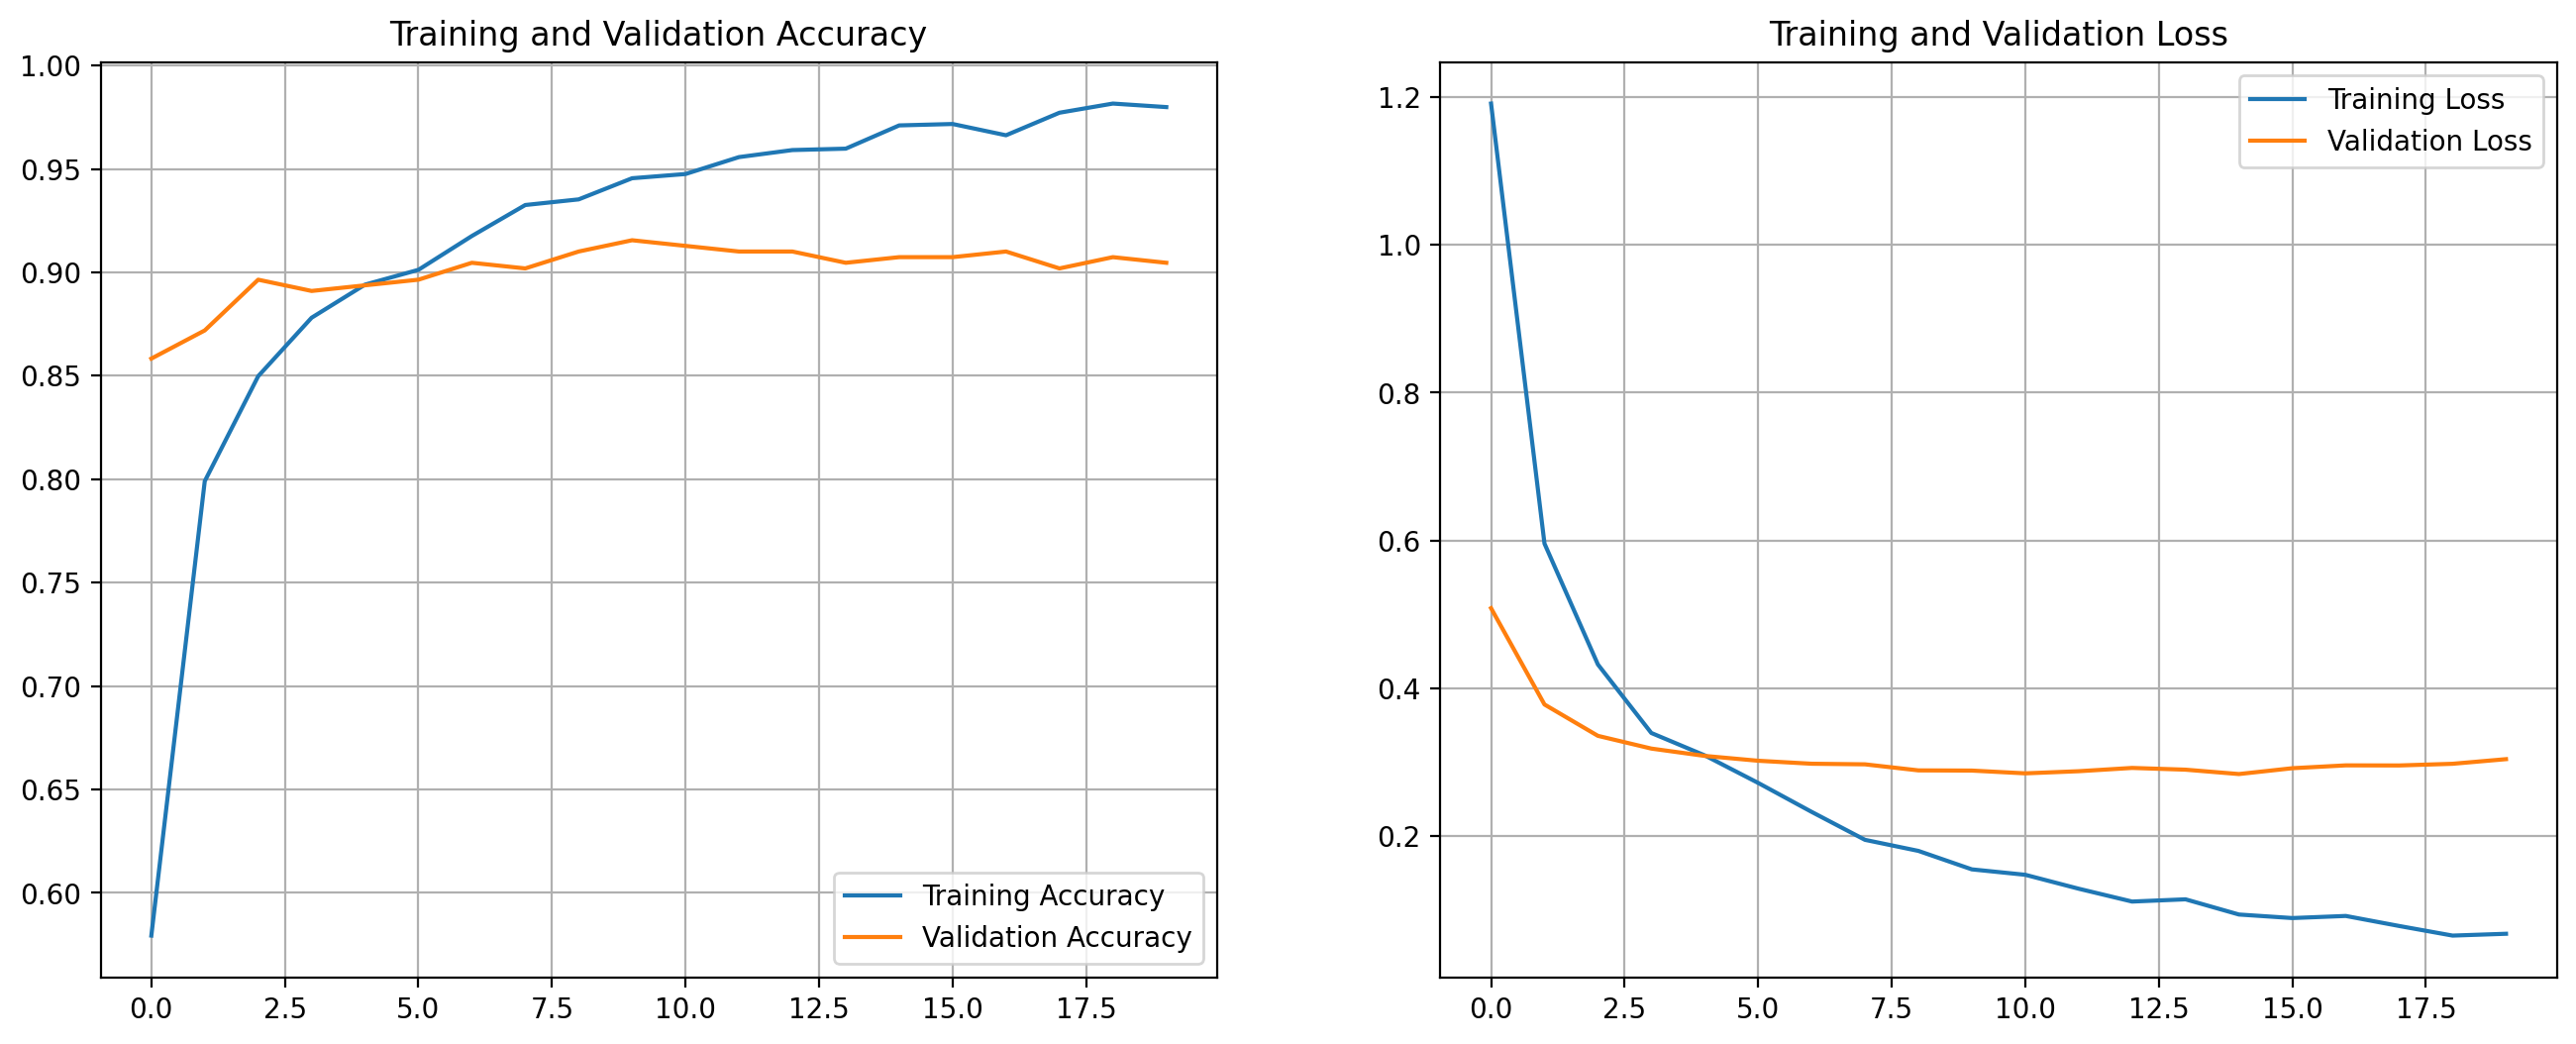

In [18]:
import matplotlib.pyplot as plt

# 학습 결과에서 정확도와 손실 값을 가져옵니다.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 6))

# 1. 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# 2. 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


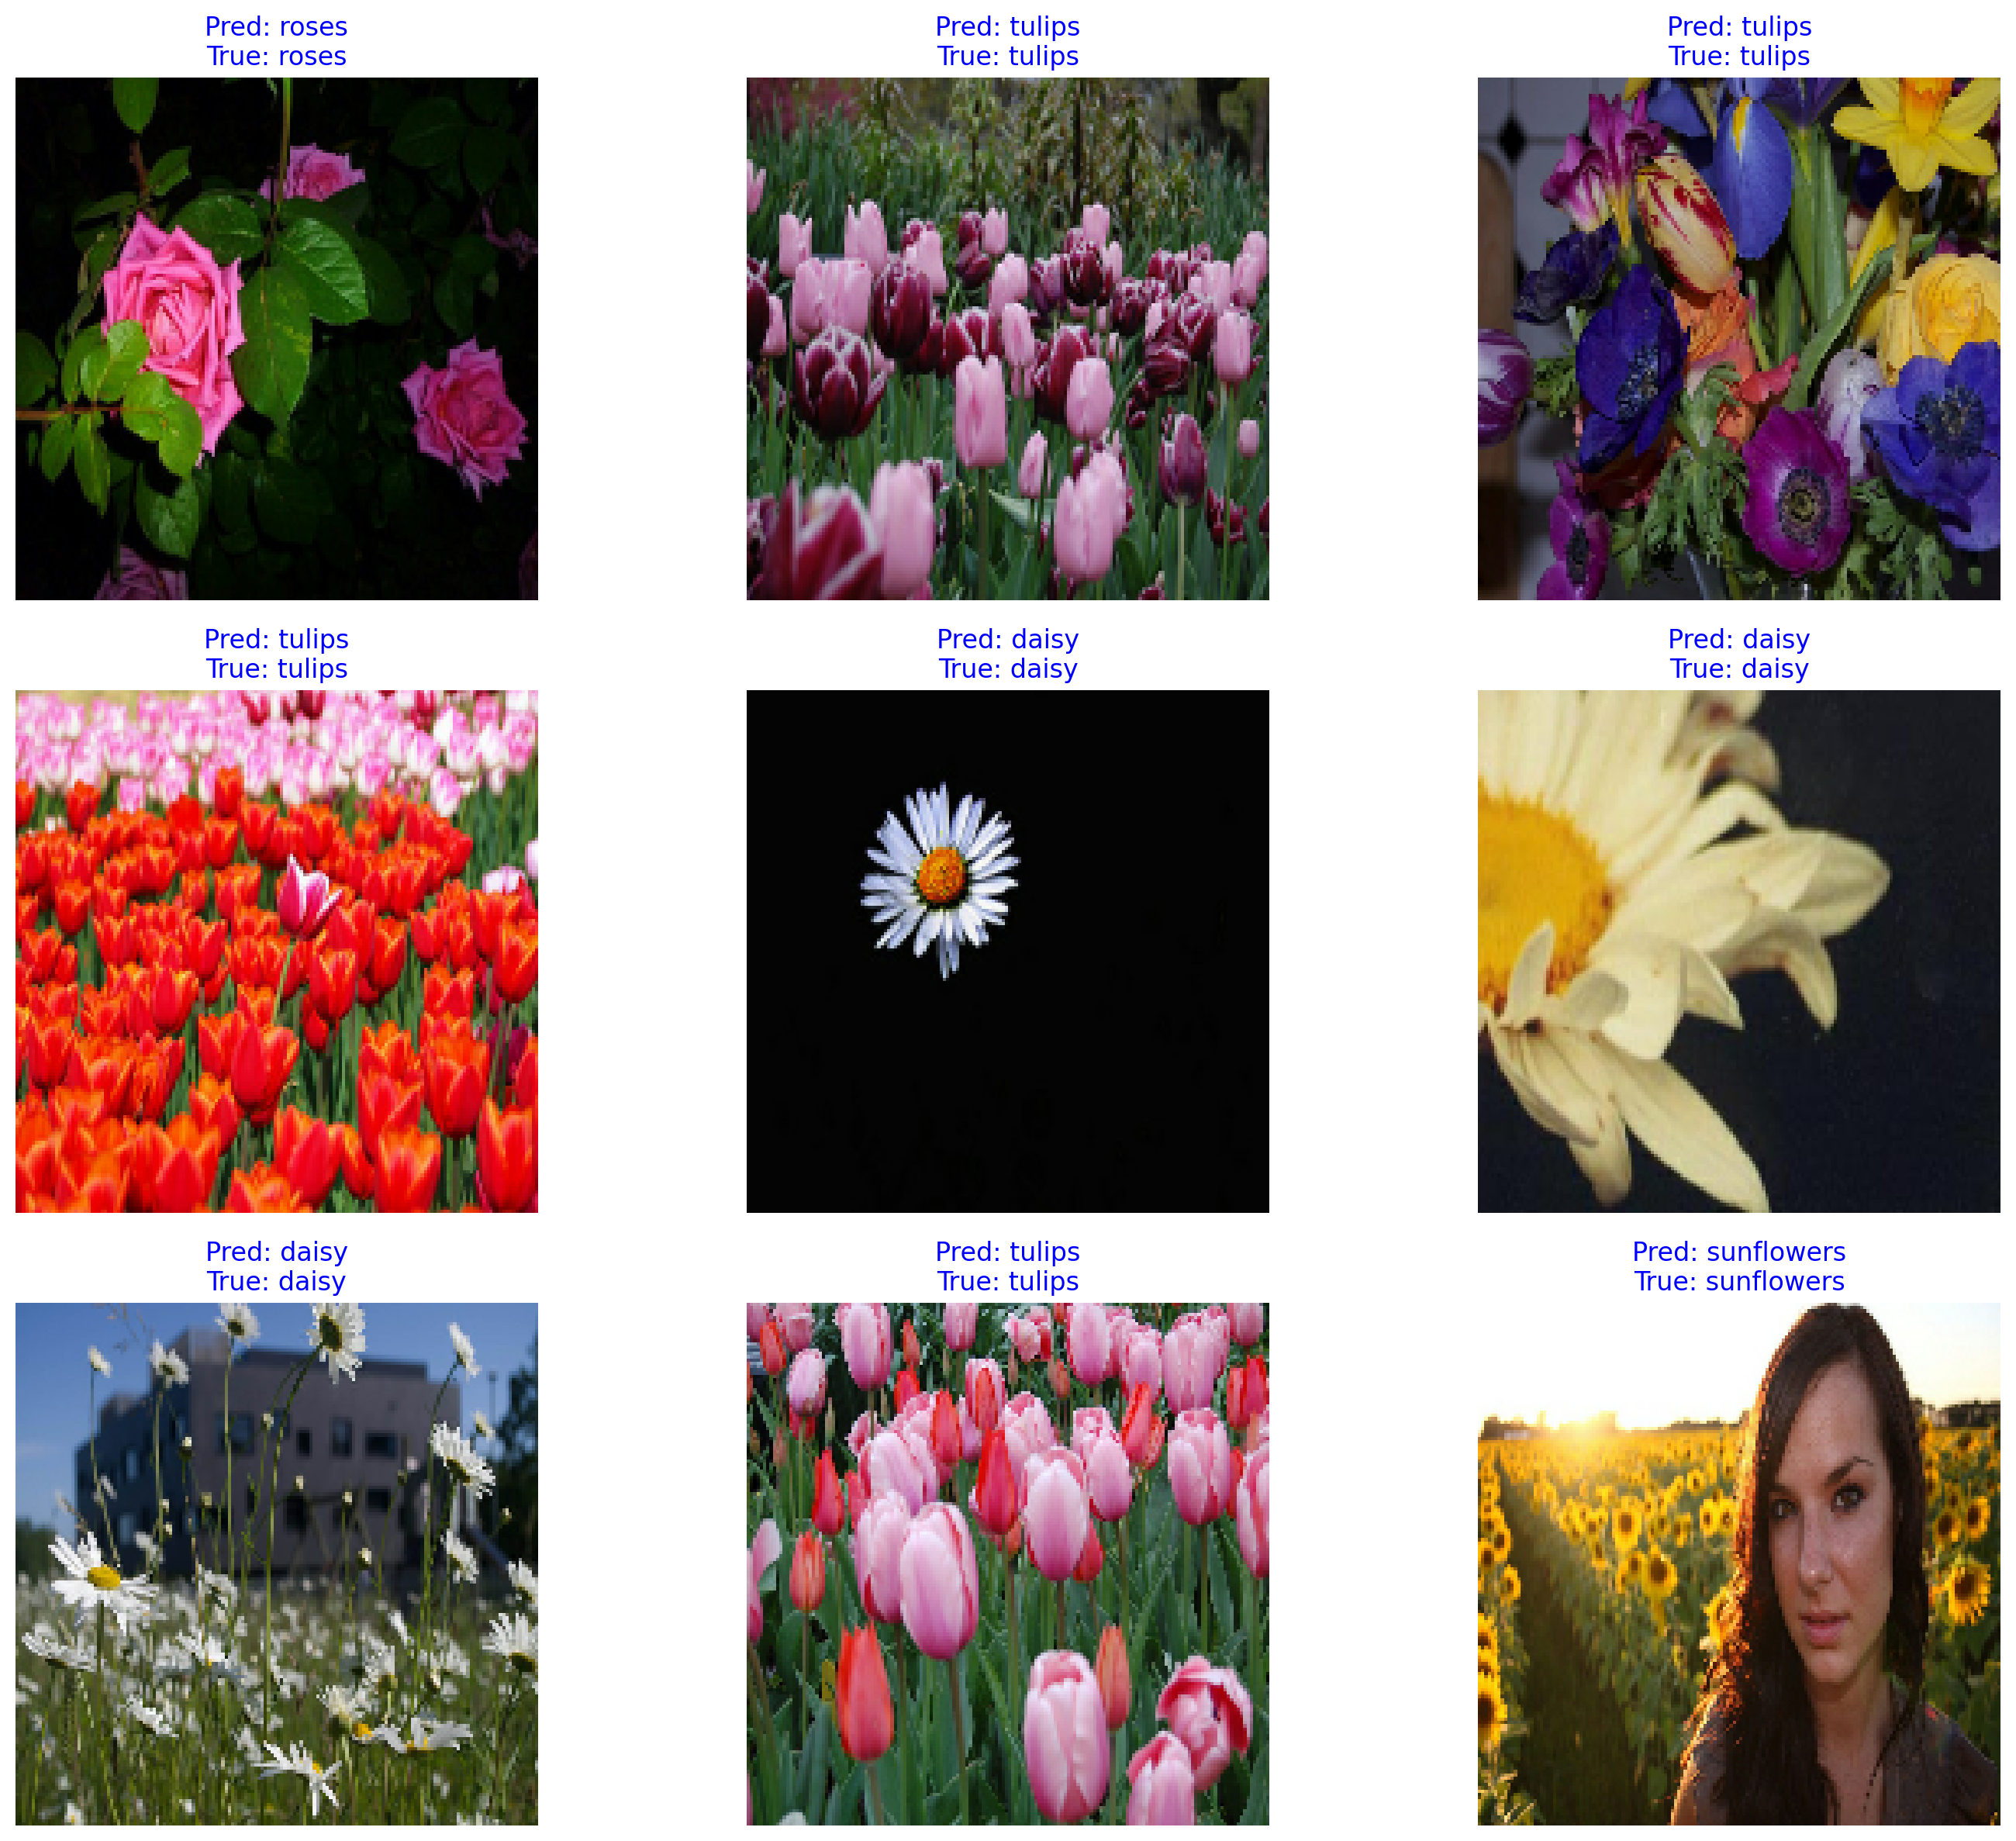

In [19]:
import numpy as np
# 꽃 이름 리스트 (metadata가 살아있을 때 기준)
class_names = metadata.features['label'].names

plt.figure(figsize=(15, 12))

# 검증 데이터셋에서 한 배치를 가져옵니다.
for images, labels in validation_batches.take(1):
    predictions = model.predict(images)

    for i in range(9): # 9개만 확인
        plt.subplot(3, 3, i + 1)

        # 정규화 해제하여 이미지 표시
        plt.imshow((images[i] + 1) / 2)

        # 모델이 예측한 인덱스
        predict_index = np.argmax(predictions[i])
        # 실제 정답 인덱스
        true_index = int(labels[i])

        # 맞혔으면 파란색, 틀렸으면 빨간색 제목
        color = 'blue' if predict_index == true_index else 'red'

        plt.title(f"Pred: {class_names[predict_index]}\nTrue: {class_names[true_index]}", color=color)
        plt.axis('off')

plt.tight_layout()
plt.show()